# CLustering

### import lib

In [2]:
import matplotlib.pyplot as plt 
import numpy as np              
from sklearn.cluster import KMeans  
import sklearn.metrics as sklm  
import pandas as pd
import geopandas as gpd
import csv
from sklearn import metrics
from sklearn.cluster import DBSCAN
from esda.adbscan import ADBSCAN

# 直接跳到最后

### loading data

In [39]:
"""
data_filename1 = 'house price mosa1.csv'
data1 = np.genfromtxt(data_filename1,delimiter = ',')

data_filename2 = 'busstops1.csv'
data2 = np.genfromtxt(data_filename2,delimiter = ',')

data_filename3 = 'Crime_rates_MSOA.csv'
data3 = np.genfromtxt(data_filename3,delimiter = ',')
"""

"\ndata_filename1 = 'house price mosa1.csv'\ndata1 = np.genfromtxt(data_filename1,delimiter = ',')\n\ndata_filename2 = 'busstops1.csv'\ndata2 = np.genfromtxt(data_filename2,delimiter = ',')\n\ndata_filename3 = 'Crime_rates_MSOA.csv'\ndata3 = np.genfromtxt(data_filename3,delimiter = ',')\n"

In [40]:
data_filename = 'afterstandardization.csv'
data = np.genfromtxt(data_filename,delimiter = ',')

data0 = pd.read_csv('datawithid.csv')

In [41]:
data

array([[203.      , 168.      ,  34.836472],
       [ 60.      ,  20.      ,  11.596406],
       [137.      ,  18.      ,   9.57883 ],
       ...,
       [ 88.      ,  49.      ,   7.472124],
       [ 69.      ,  41.      ,   8.909818],
       [ 49.      ,  42.      ,  34.180573]])

#### X: price  Y: transport  Z: crime rate

In [42]:
x_select=0
y_select=1
z_select=2

x_min, x_max = 0, np.max(data[:,x_select])
y_min, y_max = 0, np.max(data[:,y_select])
z_min, z_max = 0, np.max(data[:,z_select])

## K-Means

#### init parameter

In [43]:
num_clusters=8

#### clustering

In [44]:
kmeans_output = KMeans(n_clusters=num_clusters, n_init=1).fit(data)

#### store the labels

In [45]:
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans = kmeans_output.labels_

# These lines add the cluster IDs to the original data and save the data with these added cluster IDs.
complete_data_with_clusters = np.hstack((data,np.array([clustering_ids_kmeans]).T))

In [46]:
clustering_ids_kmeans

array([4, 1, 0, 1, 0, 1, 6, 6, 6, 1, 6, 1, 1, 1, 1, 1, 6, 1, 4, 1, 7, 7,
       6, 0, 6, 1, 6, 1, 6, 6, 4, 1, 6, 1, 6, 6, 0, 6, 6, 4, 7, 6, 1, 1,
       6, 7, 1, 0, 1, 1, 0, 1, 5, 1, 6, 6, 7, 6, 1, 7, 1, 7, 1, 7, 7, 7,
       0, 6, 0, 6, 1, 0, 0, 6, 6, 6, 0, 4, 0, 6, 6, 0, 0, 6, 6, 6, 6, 6,
       0, 4, 1, 1, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 5, 7,
       7, 7, 7, 1, 7, 7, 7, 7, 1, 1, 7, 1, 1, 6, 6, 6, 6, 0, 0, 0, 4, 0,
       4, 6, 1, 0, 0, 6, 1, 0, 6, 0, 6, 0, 6, 6, 6, 6, 6, 6, 1, 0, 0, 0,
       6, 6, 6, 0, 6, 6, 6, 0, 1, 6, 6, 1, 6, 6, 6, 1, 0, 1, 1, 6, 4, 1,
       1, 1, 7, 0, 1, 1, 1, 1, 1, 1, 6, 7, 7, 7, 7, 7, 1, 0, 1, 1, 1, 6,
       6, 0, 1, 1, 1, 1, 6, 6, 1, 1, 0, 6, 1, 6, 1, 4, 6, 4, 7, 6, 5, 6,
       0, 7, 0, 7, 1, 4, 6, 7, 0, 6, 6, 1, 1, 6, 4, 6, 1, 1, 7, 6, 1, 7,
       7, 7, 1, 7, 6, 1, 7, 1, 7, 1, 1, 7, 1, 1, 0, 7, 7, 7, 6, 1, 7, 1,
       6, 1, 1, 7, 6, 0, 1, 1, 7, 7, 1, 1, 1, 1, 6, 1, 1, 7, 7, 6, 1, 0,
       4, 1, 1, 7, 0, 6, 1, 1, 1, 6, 6, 1, 1, 7, 7,

#### assess the init model via Silhouette score

In [47]:
silhouette_kmeans = sklm.silhouette_score(data,clustering_ids_kmeans)
silhouette_kmeans

0.3362548492823919

#### calibration via SSE

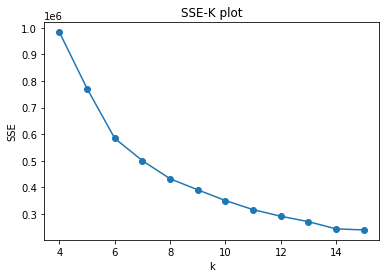

In [48]:
SSE = []
for k in range(4, 16):
    model = KMeans(n_clusters=k).fit(data)
    SSE.append(model.inertia_)
X = range(4, 16)
fig_title = 'SSE-K plot'
plt.title(fig_title)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')

#### A new k-means model

In [58]:
num_clusters_new=6
kmeans_output_new = KMeans(n_clusters=num_clusters_new, n_init=1).fit(data)
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans_new = kmeans_output_new.labels_

# These lines add the cluster IDs to the original data and save the data with these added cluster IDs.
complete_data_with_clusters_new = np.hstack((data,np.array([clustering_ids_kmeans_new]).T))

In [60]:
print(clustering_ids_kmeans_new)
type(complete_data_with_clusters_new)
complete_data_with_clusters_new

[5 0 1 4 1 0 4 4 4 0 4 0 4 0 0 0 4 0 5 4 0 0 4 1 4 0 4 0 4 4 5 0 4 4 4 4 1
 4 4 5 0 4 0 0 4 0 0 1 0 4 1 4 5 0 4 4 0 4 4 0 4 0 0 0 0 0 1 4 1 4 0 1 1 4
 4 4 1 1 1 4 4 1 1 4 4 4 4 4 1 5 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 5 0 0
 0 0 0 0 0 0 0 4 4 0 0 0 4 4 4 4 1 1 1 5 1 5 4 0 1 1 4 0 1 4 1 4 1 4 4 4 4
 4 4 4 1 1 1 4 4 4 1 4 4 4 1 4 4 4 4 4 4 4 4 1 0 4 4 5 0 0 0 0 1 4 4 4 0 0
 0 4 0 0 0 0 0 4 1 4 0 0 4 4 1 4 0 0 0 4 4 4 0 1 4 0 4 0 5 4 1 0 4 2 4 1 0
 1 0 4 1 4 0 1 4 4 4 4 4 1 4 4 0 0 4 0 0 0 0 0 0 4 0 0 0 0 4 0 0 4 4 1 0 0
 0 4 0 0 4 4 0 0 0 4 1 0 4 0 0 0 4 0 0 4 4 4 0 0 4 0 1 1 0 0 0 1 4 0 0 4 4
 4 0 0 0 0 0 0 0 4 0 0 0 0 0 4 0 0 4 0 5 0 0 4 0 0 1 0 0 0 4 0 4 4 0 0 4 0
 4 4 0 0 4 4 0 1 1 2 5 1 0 4 0 0 4 5 0 4 0 0 4 0 4 0 0 0 0 4 4 1 0 4 0 1 4
 4 4 0 0 0 0 0 0 0 0 4 0 0 4 0 1 0 0 0 5 1 0 4 4 4 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 0 0 4 4 4 0 0 0 0 0 0 0 4 0 0 4 0 4 0 0 4 1 0 0 0 0 0 4 0 0
 0 0 0 4 4 0 0 0 0 4 1 0 0 0 0 0 0 0 0 0 4 4 4 4 1 0 5 4 1 1 1 1 1 1 4 1 1
 4 4 4 1 1 4 4 4 4 1 4 4 

array([[203.      , 168.      ,  34.836472,   5.      ],
       [ 60.      ,  20.      ,  11.596406,   0.      ],
       [137.      ,  18.      ,   9.57883 ,   1.      ],
       ...,
       [ 88.      ,  49.      ,   7.472124,   4.      ],
       [ 69.      ,  41.      ,   8.909818,   0.      ],
       [ 49.      ,  42.      ,  34.180573,   0.      ]])

#### save in csv

In [61]:
datasave = pd.DataFrame(complete_data_with_clusters_new)
datasave.to_csv('clustering_result.csv')

#### assessment

In [59]:
silhouette_kmeans_new = sklm.silhouette_score(data,clustering_ids_kmeans_new)
silhouette_kmeans_new

0.3974154769652522

### Result

#### check the groups

IndexError: list index out of range

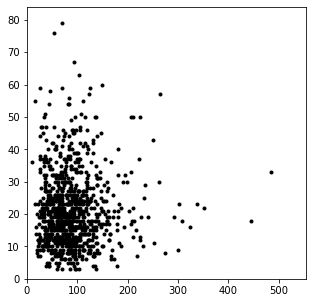

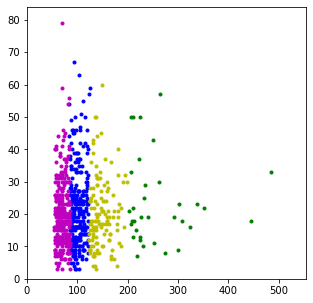

In [83]:
data_by_cluster = []

for i in range(num_clusters_new):
    
    this_data = []
    
    for row in complete_data_with_clusters_new:
        
        if row[-1] == i:
            this_data.append(row)
    
    this_data = np.array(this_data)
    
    data_by_cluster.append(this_data)

def setup_figure():
    
    plt.xlim([x_min, x_max*0.5])
    plt.ylim([y_min, y_max*0.5])



# FIGURE 0 : UNCLUSTERED DATA

# These lines extract the y-values and the x-values from the data:
x_values = data[:,x_select]
y_values = data[:,y_select]

# The next lines create and save the plot:
plt.figure(0,figsize=(5,5))
setup_figure()
plt.plot(x_values,y_values,'k.')



# FIGURES 1-N : SEPARATE CLUSTER PLOTS

# This is a list of colours to differentiate each cluster.
color_list = ['b','r','g','m','y']



# FIGURE N + 1 : COMBINED CLUSTER PLOT

# These lines create a plot with all the data points, coloured by cluster.
plt.figure(num_clusters_new + 1,figsize=(5,5))
setup_figure()

for i in range(num_clusters_new):
    
    x_values = data_by_cluster[i][:,x_select]
    y_values = data_by_cluster[i][:,y_select]
    
    plt.plot(x_values,y_values,color_list[i % num_clusters_new] + '.')

#### map

In [62]:
datafin = pd.read_csv('clustering_result_final.csv')

In [7]:
gdf = gpd.read_file(f"zip://statistical-gis-boundaries-london.zip!statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MSOA11CD   983 non-null    object  
 1   MSOA11NM   983 non-null    object  
 2   LAD11CD    983 non-null    object  
 3   LAD11NM    983 non-null    object  
 4   RGN11CD    983 non-null    object  
 5   RGN11NM    983 non-null    object  
 6   USUALRES   983 non-null    int64   
 7   HHOLDRES   983 non-null    int64   
 8   COMESTRES  983 non-null    int64   
 9   POPDEN     983 non-null    float64 
 10  HHOLDS     983 non-null    int64   
 11  AVHHOLDSZ  983 non-null    float64 
 12  geometry   983 non-null    geometry
dtypes: float64(2), geometry(1), int64(4), object(6)
memory usage: 100.0+ KB


In [64]:
plotkmeans = pd.merge(gdf, datafin ,left_on='MSOA11CD', right_on='id', how='inner').reset_index()

#### the map of kmeans

'\nplt.legend()\nplt.xlabel()\nplt.ylabel()\nplt.title()\n'

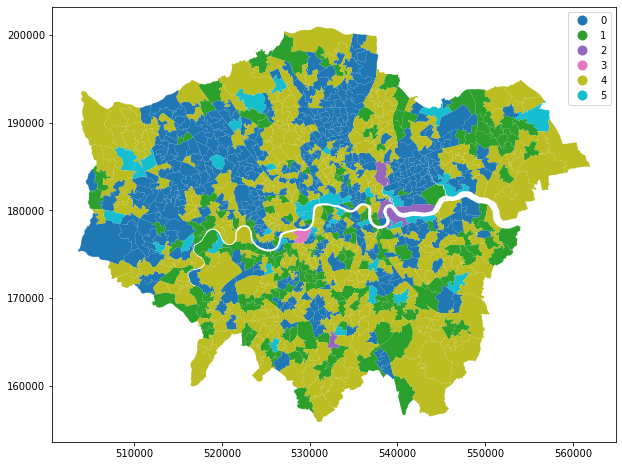

In [67]:
plotkmeans.plot(column='group', categorical=True, legend=True, figsize=(12,8))
"""
plt.legend()
plt.xlabel()
plt.ylabel()
plt.title()
"""

---

## DBSCAN

In [50]:
data_filename = 'demo1.csv'
data = np.genfromtxt(data_filename,delimiter = ',')

In [36]:
epsilon = 1
minPts = 2

#### clustering

In [37]:
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(data)

DBSCAN(eps=1, min_samples=2)

In [40]:
dbscangroup = dbsc.labels_
dbscan_clustersresult = np.hstack((data,np.array([dbscangroup]).T))
dbscangroup

array([-1, -1,  0, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  2, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1,
       -1, -1,  5, -1, -1, -1, -1, -1, -1, -1,  6,  7, -1, -1, -1,  6,  8,
       -1, -1, -1, -1, -1, -1,  9, -1, -1, 10, -1, -1, 10, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, 11, -1, -1, 12, -1, -1, -1, 13, -1, -1, -1, -1,
       -1, 14, -1, 12, -1, -1, 15, -1, -1, -1, -1, -1, -1, 16, -1, -1, -1,
       -1, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, 15, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 17, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  2, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, 18, -1, -1, -1

In [143]:
dbscan_silhouette_score = metrics.silhouette_score(data, dbscangroup)
dbscan_silhouette_score

-0.6483747873787801

#### Calibration

In [83]:
res = []
for eps in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,8,10,15,20]:
    for min_samples in range(1,10):
        dbscantest = DBSCAN(eps = eps, min_samples = min_samples)
        dbscantest.fit(data)
        n_clusters = len([i for i in set(dbscantest.labels_) if i != -1])
        outliners = np.sum(np.where(dbscantest.labels_ == -1, 1,0))
        dbscangrouptest = dbscantest.labels_
        ##dbscan_silhouette_score = format(sklm.silhouette_score(data,dbscangrouptest), '.5f')
        ##dbscan_silhouette_score = metrics.silhouette_score(data, dbscangrouptest)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners})

In [84]:
df = pd.DataFrame(res)

In [85]:
res

[{'eps': 0.1, 'min_samples': 1, 'n_clusters': 982, 'outliners': 0},
 {'eps': 0.1, 'min_samples': 2, 'n_clusters': 1, 'outliners': 981},
 {'eps': 0.1, 'min_samples': 3, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 4, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 5, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 6, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 7, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 8, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.1, 'min_samples': 9, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.2, 'min_samples': 1, 'n_clusters': 982, 'outliners': 0},
 {'eps': 0.2, 'min_samples': 2, 'n_clusters': 1, 'outliners': 981},
 {'eps': 0.2, 'min_samples': 3, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.2, 'min_samples': 4, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.2, 'min_samples': 5, 'n_clusters': 0, 'outliners': 983},
 {'eps': 0.2, 'min_samples': 6, 'n_clusters': 0,

#### new model

In [73]:
epsilon = 8
minPts = 3
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(data)

dbscangroup = dbsc.labels_
dbscan_clustersresult = np.hstack((data,np.array([dbscangroup]).T))
dbscangroup

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0, -1, -1, -1, -1,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [62]:
datasave = pd.DataFrame(dbscan_clustersresult)
datasave.to_csv('demo_raw_dbscan.csv')

In [63]:
datafin2 = pd.read_csv('demo_raw_dbscan_full.csv')

In [47]:
ppd = pd.merge(gdf, datafin2 ,left_on='MSOA11CD', right_on='id', how='inner').reset_index()

In [74]:
dbscan_silhouette_score_new = metrics.silhouette_score(data, dbscangroup)
dbscan_silhouette_score_new

0.13678693907846834

In [ ]:
ppd.plot(column='group', categorical=True, legend=True, figsize=(24,16))
plt.title("DBSCAN",fontsize=30)

---

# 从这里开始

In [76]:
data_filename = 'demo1.csv'
data = np.genfromtxt(data_filename,delimiter = ',')

In [46]:
x_select=0

z_select=1
w_select=2

x_min, x_max = 0, np.max(data[:,x_select])

z_min, z_max = 0, np.max(data[:,z_select])
w_min, w_max = 0, np.max(data[:,w_select])

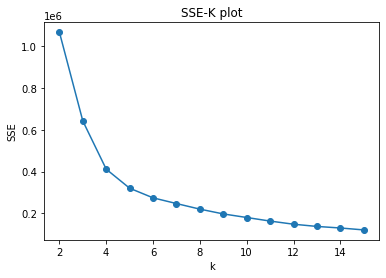

In [47]:
SSE = []
for k in range(2, 16):
    model = KMeans(n_clusters=k).fit(data)
    SSE.append(model.inertia_)
X = range(2, 16)
fig_title = 'SSE-K plot'
plt.title(fig_title)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')

In [80]:
num_clusters_new=5
kmeans_output_new = KMeans(n_clusters=num_clusters_new, n_init=1).fit(data)
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans_new = kmeans_output_new.labels_

# These lines add the cluster IDs to the original data and save the data with these added cluster IDs.
complete_data_with_clusters_new = np.hstack((data,np.array([clustering_ids_kmeans_new]).T))

In [81]:
print(clustering_ids_kmeans_new)
type(complete_data_with_clusters_new)
complete_data_with_clusters_new

[1 4 4 4 1 4 4 4 4 4 1 4 4 4 0 0 4 4 1 4 1 4 1 4 4 4 4 1 4 4 4 4 4 4 4 4 4
 4 4 4 4 1 1 1 4 1 1 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 1 1 4 4 4 1 1 1 1 1 1 1 1
 1 4 1 1 1 1 4 1 3 1 1 1 3 1 3 4 4 1 1 1 4 4 1 4 1 1 1 4 1 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 4 4 3 3 1 1 3 3 3 0 1 3 0 1 3 3 3 0 0 3
 0 0 0 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 1 4 4 4 4 4 4 1 1 1 4 4 1 4 4 4 3 1 1 4
 4 1 1 1 3 1 4 1 1 1 3 1 1 4 4 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 1 1 4 1 4 1 4 1 1 1 4 4 4 1 1 4 1 4 1 1 1 1 1 1 4 4 4 1 4 1 1
 1 1 4 4 4 4 1 1 1 1 1 1 1 3 1 3 3 0 1 3 3 3 1 4 3 4 0 0 1 3 0 3 1 1 3 0 0
 0 1 1 1 4 4 0 0 1 0 1 0 0 1 0 0 3 3 1 3 1 1 3 3 1 1 3 1 3 1 3 1 1 1 1 4 3
 3 3 1 4 3 3 4 3 1 1 4 4 3 0 0 1 1 3 1 1 3 1 1 1 1 3 1 4 4 4 4 4 4 4 4 4 4
 1 4 1 4 4 4 4 1 1 4 3 1 1 4 4 4 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 3 4
 4 4 1 4 4 1 4 4 4 4 4 4 

array([[ 49.825     ,  34.836472  ,  58.83736995,   1.        ],
       [ 33.75      ,  11.596406  ,  18.377975  ,   4.        ],
       [ 31.9375    ,   9.57883   ,  18.377975  ,   4.        ],
       ...,
       [ 37.838     ,   8.234681  , 210.72464   ,   0.        ],
       [ 37.435     ,   7.472124  , 323.68421   ,   2.        ],
       [ 37.919     ,   8.909818  , 133.790325  ,   0.        ]])

In [50]:
datasave = pd.DataFrame(complete_data_with_clusters_new)
datasave.to_csv('demo_raw.csv')

In [16]:
datafin2 = pd.read_csv('for picture kmeans.csv')

In [17]:
plotwithscore = pd.merge(gdf, datafin2 ,left_on='MSOA11CD', right_on='id', how='inner').reset_index()

Text(0.5, 1.0, 'K-Means')

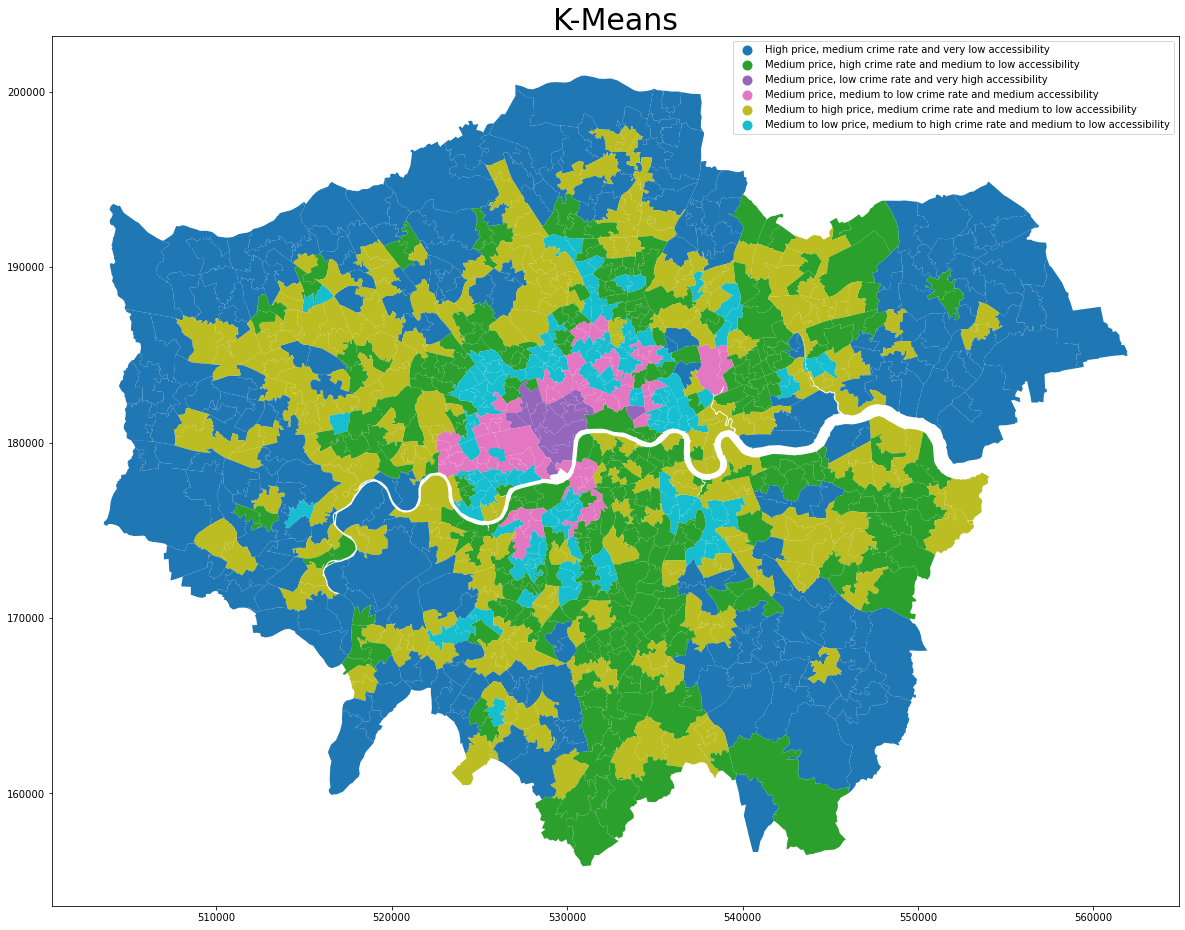

In [23]:
plotwithscore.plot(column='group', categorical=True, legend=True, figsize=(24,16))
plt.title("K-Means",fontsize=30)

In [58]:
centers = kmeans_output_new.cluster_centers_
centers

array([[ 36.34477076,  16.10217926,  63.51636104],
       [ 35.515825  ,  12.61283952, 161.08411758],
       [ 37.50413462,  13.78856919,  43.32203452],
       [ 36.03971429,  10.64467821, 309.57564321],
       [ 34.06839744,  14.97336252, 105.56717731],
       [ 42.17593137,  13.25347259,  20.92360318]])

In [82]:
dbscan_silhouette_score_new = metrics.silhouette_score(data, clustering_ids_kmeans_new)
dbscan_silhouette_score_new

0.4178353639095544